# Introduction to Data

## Getting started

There are basically three options to run the codes in this tutorial:

1. Copy-Paste the codes from the website and run the codes line-by-line on your own computer with your preferred IDE (Jupyter Lab, Spyder, PyCharm etc.).
2. Download this Notebook (see below) and run it using Jupyter Lab which you should have installed by following the [installation instructions](https://otesama2023.readthedocs.io/en/latest/info/installing-miniconda.html).
3. Run the codes using Binder (see below) which is the easiest way, but has very limited computational resources (i.e. can be very slow).


### Download the Notebook

You can download this tutorial Notebook to your own computer by clicking the **Download button** from the Menu on the top-right section of the website. 

- Right-click the option that says `.ipynb` and choose **"Save link as .."**

![Download tutorial Notebook.](img/Download_notebook_button.png)

### Run the codes on your own computer

Before you can run this Notebook, and/or do any programming, you need to launch the Jupyter Lab programming environment. The JupyterLab comes with the environment that you installed earlier (if you have not done this yet, follow the [installation instructions](https://otesama2023.readthedocs.io/en/latest/info/installing-miniconda.html)). To run the JupyterLab:

1. Using terminal/command prompt, navigate to the folder where you have downloaded the Jupyter Notebook tutorial: `$ cd /mydirectory/`
2. Activate the programming environment: `$ conda activate geo`
3. Launch the JupyterLab: `$ jupyter lab`

After these steps, the JupyterLab interface should open, and you can start executing cells (see hints below at "Working with Jupyter Notebooks").

#### Alternatively: Run codes in Binder (with limited resources)

Alternatively (not recommended due to limited computational resources), you can run this Notebook by launching a Binder instance. You can find buttons for activating the python environment at the top-right of this page which look like this:

![Launch Binder](img/launch_binder.png)

### Working with Jupyter Notebooks

Jupyter Notebooks are documents that can be used and run inside the JupyterLab programming environment containing the computer code and rich text elements (such as text, figures, tables, and links). 

**A couple of hints**:

- You can **execute a cell** by clicking a given cell that you want to run and pressing <kbd>Shift</kbd> + <kbd>Enter</kbd> (or by clicking the "Play" button on top)
- You can **change the cell-type** between `Markdown` (for writing text) and `Code` (for writing/executing code) from the dropdown menu above. 

See **further details and help for** [**using Notebooks and JupyterLab from here**](https://pythongis.org/part1/chapter-01/nb/04-using-jupyterlab.html). 

**Lesson objectives**

This tutorial focuses on how to work with various geospatial data to construct a **spatial networks** and learn how to construct a routable **directed** graph for Networkx and find shortest paths along the given street network based on travel times or distance by car using **R5py**.  In addition, we will learn about the relevant data to calculate GHG emissions for different travel modes of commutating among multiple origin-destination zones simultaneously.  

## Data requirements

### Data for creating a routable network

**R5py** is a Python library for routing and calculating travel time matrices on multimodal transport networks (walk, bike, public transport and car).
It provides a simple and friendly interface to R<sup>5</sup> (*the Rapid Realistic Routing on Real-world and Reimagined networks*) which is a [routing engine](https://github.com/conveyal/r5) developed by [Conveyal](https://conveyal.com/). `R5py` is designed to interact with [GeoPandas](https://geopandas.org) GeoDataFrames, and it is inspired by [r5r](https://ipeagit.github.io/r5r) which is a similar wrapper developed for R. `R5py` exposes some of R5’s functionality via its [Python API](reference.html), in a syntax similar to r5r’s. At the time of this writing, only the computation of travel time matrices has been fully implemented. Over time, `r5py` will be expanded to incorporate other functionalities from R5.
When calculating travel times with `r5py`, you typically need a couple of datasets: 

- **A road network dataset from OpenStreetMap** (OSM) in Protocolbuffer Binary (`.pbf`) -format: 
  - This data is used for finding the fastest routes and calculating the travel times based on walking, cycling and driving. In addition, this data is used for walking/cycling legs between stops when routing with transit. 
  - *Hint*: Sometimes you might need modify the OSM data beforehand, e.g. by cropping the data or adding special costs for travelling (e.g. for considering slope when cycling/walking). When doing this, you should follow the instructions at [Conveyal website](https://docs.conveyal.com/prepare-inputs#preparing-the-osm-data). For adding customized costs for pedestrian and cycling analyses, see [this repository](https://github.com/RSGInc/ladot_analysis_dataprep).

- **A transit schedule dataset** in General Transit Feed Specification (GTFS.zip) -format (optional):
   - This data contains all the necessary information for calculating travel times based on public transport, such as stops, routes, trips and the schedules when the vehicles are passing a specific stop. You can read about [GTFS standard from here](https://developers.google.com/transit/gtfs/reference).
   - *Hint*: `r5py` can also combine multiple GTFS files, as sometimes you might have different GTFS feeds representing e.g. the bus and metro connections. 

#### Where to get these datasets?

Here are a few places from where you can download the datasets for creating the routable network:

- **OpenStreetMap data in PBF-format**:

  - [pyrosm](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one)  -library. Allows downloading data directly from Python (based on GeoFabrik and BBBike).
  - [pydriosm](https://pydriosm.readthedocs.io/en/latest/quick-start.html#download-data) -library. Allows downloading data directly from Python (based on GeoFabrik and BBBike).
  - [GeoFabrik](http://download.geofabrik.de/) -website. Has data extracts for many pre-defined areas (countries, regions, etc).
  - [BBBike](https://download.bbbike.org/osm/bbbike/) -website. Has data extracts readily available for many cities across the world. Also supports downloading data by [specifying your own area or interest](https://extract.bbbike.org/).
  - [Protomaps](https://protomaps.com/downloads/osm) -website. Allows to download the data with custom extent by specifying your own area of interest.


- **GTFS data**:  
  - [Transitfeeds](https://transitfeeds.com/) -website. Easy to navigate and find GTFS data for different countries and cities. Includes current and historical GTFS data. Notice: The site will be depracated in the future.  
  - [Mobility Database](https://database.mobilitydata.org) -website. Will eventually replace TransitFeeds -website. 
  - [Transitland](https://www.transit.land/operators) -website. Find data based on country, operator or feed name. Includes current and historical GTFS data.

### Data for origin and destination locations (H3 hexagonal grid)

In addition to OSM and GTFS datasets, you need data that represents the origin and destination locations (OD-data) for routings and understanding the number of people travelling between them. This data is typically stored in one of the geospatial data formats, such as Shapefile, GeoJSON or GeoPackage. In the workshop tutorials, we are using H3 hexagonal grid data at resolution 9 to represent the origin-destination locations (scroll down for further details with code):

![H3 data sample](img/H3-resolutions.png)

### Travel demand: Mobile Phone Data

To understand the travel demand in a given city (i.e. how many people travel between given locations), you need to have some data that is able to provide that information. Traditionally travel surveys and statistics have been used for this purpose, but in this workshop we are using mobile phone data from a company called Locomizer to extract information about the travel demand in Helsinki Region. Locomizer data is aggregated and anonymized into H3 hexagons and it reveals the number of users that travel from a given origin hexagon to a given destination hexagon at a specific day and hour (i.e. revealing Origin-destination flows in the city). 

In this tutorial, we share you aggregated mobility data that represents the OD-flows in Helsinki Region at H9-resolution during a regular Thursday recorded between April 15th to May 15th 2023:

![Locomizer sample](img/OD-flows.png)

    
### Data for GHG emission factors

The [International Transport Forum (ITF)](https://www.itf-oecd.org/) has developed a comprehensive life-cycle analysis [Excel-based tool](data/life-cycle-assessment-calculations-2020.xlsx) of urban transport modes including new mobility services, such as shared vehicles and ridesourcing. The Excel-based tool (provide the link?) includes calculations and assumptions made for the ITF report titled as "Good to go? Assessing the environmental performance of new mobility in cities". 
- **Sources**:
    - Cazzola, P. and Crist, P., 2020. [Good to go? Assessing the environmental performance of new mobility](https://www.itf-oecd.org/good-go-assessing-environmental-performance-new-mobility)
    - [The electricity generation mix of Finland in 2020.](https://www.iea.org/countries/finland)

From these sources, a CSV file named ["LCA_gCO2_per_pkm_by_transport_mode.csv"](data/LCA_gCO2_per_pkm_by_transport_mode.csv) is created, consisting of GHG emissions per passenger-kilometer (g CO<sub>2</sub>/pkm) by transport modes derived from the mentioned LCA tool by ITF. The columns represent the different transport modes and the rows represent the GHG emissions. The GHG emissions of the transport modes have been divided into four separate components: vehicle component, fuel component, infrastructure component and operational services. The explanations of the acronyms (in the transport modes names) are: BEV = battery electric vehicle; HEV = hybrid electric vehicle; ICE = internal combustion engine; FCEV = fuel cell electric vehicle; PHEV = plug-in hybrid electric vehicle. 



## Helsinki Regional Transport Authority (HSL) survey data
The Helsinki Regional Transport Authority (Finnish: Helsingin seudun liikenne, HSL; Swedish: Helsingforsregionens trafik, HRT) is the inter-municipal body responsible for maintaining the public transportation network across the nine municipalities of Greater Helsinki, Finland.

HSL oversees the operation of Helsinki's entire public transportation system, which includes local buses, trams, metro trains, ferries, commuter trains, and bikeshare services. According to an HSL survey on the number of trips, residents of the Helsinki region aged seven and above made a total of 4.6 million trips on a typical weekday in the fall of 2023. The detailed report can be found [here](data/lt23-kulkutapajakaumat-hsl-nettisivuille.pdf).

Based on the modality of travel choice and different percentages of various weekday trips of residents of the Helsinki region in autumn 2023, the survey report contains the following ratio of travel mode share in the HSL-alue yhteensä (i.e. total HSL area):

In [1]:
Car_share_Hsl = 0.35 ## Henkilöauto
PT_share_Hsl = 0.23 ## Joukkoliikenne
Bike_share_Hsl = 0.08  ## Polkupyörä
Walk_share_Hsl = 0.33  ## Kävely
Other_share_Hsl = 0.01 ## Muu

We will be using these data in the later part of the tutorial to split the travellers among OD hexagon pairs accordingly to calculate CO2 emissions. 

## Introduction to H3 Hexagonal Hierarchical Geospatial Indexing System

In this tutorial, first, we will learn how to work with Uber's H3 Hexagonal Hierarchical Geospatial Indexing System in Python. We will utilize the geographical data around the city center area of Helsinki, Finland. 

In [2]:
# A point of interest (poi) at the Helsinki Central Location
from shapely.geometry import Point 
import osmnx as ox
import geopandas as gpd

# Geocode a specific place in Helsinki
address = "Scandic Hub, Helsinki" 
lat, lon = ox.geocode(address)

# Create a GeoDataFrame out of the coordinates
poi = gpd.GeoDataFrame({"geometry": [Point(lon, lat)], "name": "Scandic Hub, Helsinki", "id": [0]}, index=[0], crs="epsg:4326")
# plotting the poi
poi.explore(max_zoom=13, color="red", marker_kwds={"radius": 12})

We can select a set of neighbouring hexagon cells of resolution 9 from the centre of Helsinki. This can be achieved by the following function. Details can be found [here](https://h3geo.org/docs/3.x/). The syntaxes used in this tutorial work for the h3 version v3.7.7.

In [3]:
import shapely
import h3
import matplotlib.pyplot as plt

# h3 hexagons are to be created at a specified resolution from 1-10 
resolution = 9

# We can indicate the number of hexagonal rings around the central hexagon
ring_size = 6

# Get the H3 hexagons covering the central Helsinki 
center_h3 = h3.geo_to_h3(lat, lon, resolution) 
hexagons = list(h3.k_ring(center_h3, ring_size))  # Convert the set to a list

In [4]:
# Create a GeoDataFrame with hexagons and their corresponding geometries
hexagon_geometries = [shapely.geometry.Polygon(h3.h3_to_geo_boundary(hexagon, geo_json=True)) for hexagon in hexagons]
hexagon_df = gpd.GeoDataFrame({'Hexagon_ID': hexagons, 'geometry': hexagon_geometries},crs="epsg:4326")
#hexagon_df.explore()

In [5]:
## Create a column of centroids and make them as point geometry
hexagon_df["H3_centroids"] = hexagon_df.Hexagon_ID.apply(lambda x: Point(h3.h3_to_geo(str(x))))
hexagon_df.head()

Hexagon_ID                                           geometry  \
0  891126d3353ffff  POLYGON ((24.94159 60.15931, 24.94428 60.15862...   
1  891126d33d7ffff  POLYGON ((24.93064 60.16377, 24.93332 60.16308...   
2  891126d3363ffff  POLYGON ((24.95633 60.16538, 24.95901 60.16469...   
3  891126d3063ffff  POLYGON ((24.92036 60.16312, 24.92304 60.16244...   
4  891126d1593ffff  POLYGON ((24.96079 60.17081, 24.96347 60.17012...   

                                   H3_centroids  
0  POINT (60.16032251549641 24.944048825865394)  
1  POINT (60.16478200206416 24.933092024297576)  
2  POINT (60.166392022278345 24.95878629068722)  
3    POINT (60.1641367180599 24.92281687515484)  
4   POINT (60.17181804204812 24.96324875788693)

## Load and prepare the origin and destination data
We will use a pair of these hexagons as origin and destinations to understand the travel patterns of commuters and Green House Gas (GHG) emissions of individual users due to different modes of transport. For this tutorial, we will use a sample of H3 hexagons that correspond with the Locomizer data at resolution 9 in the Helsinki region.

### Reading the Locomizer data
Let's start by understanding a sample of the Locomizer dataset into a pandas `DataFrame` that we can use as origin-destination hexagons that contain the number of users travelled in between. 

In [6]:
import pandas as pd

# Reading the OD data
loco_sample_OD = pd.read_csv("data/Locomizer_data/Locomizer_Valid_OD_Hexes_filtered.csv",index_col=0)

loco_sample_OD.head()

destination_code_level_9 origin_code_level_9  NUMBER_OF_USERS  DWELL_TIME  \
0          890899695b3ffff     89089961267ffff         0.666667    5.487959   
1          8908996800bffff     89089968003ffff         3.666667    3.687860   
2          8908996800fffff     89089968003ffff         0.666667    2.012012   
3          8908996801bffff     89089968003ffff         0.666667    2.665467   
4          89089968063ffff     89089968003ffff         2.000000    3.959179   

   EXTRAPOLATED_NUMBER_OF_USERS  NUMBER_OF_SIGNALS  \
0                     92.888889           7.444444   
1                    362.555556           5.222222   
2                     71.000000           0.888889   
3                     79.111111           1.222222   
4                    235.666667           2.555556   

   EXTRAPOLATED_NUMBER_OF_SIGNALS  PROPORTION_OF_USERS   NAMEFIN  
0                      935.555556             5.026455  Helsinki  
1                      509.666667             9.801587  Helsinki  
2                       92.222222             1.014911  Helsinki  
3                      154.111111             4.021164  Helsinki  
4                      287.888889             4.082492  Helsinki

The `loco_sample_OD` DataFrame contains a few columns, namely `origin_code_level_9`, `destination_code_level_9`, `DAY` `NUMBER_OF_USERS`, `DWELL_TIME`,  `EXTRAPOLATED_NUMBER_OF_USERS` `NUMBER_OF_SIGNALS`, `EXTRAPOLATED_NUMBER_OF_SIGNALS`, `PROPORTION_OF_USERS`, and `NAMEFIN`. We will begin with visualising origin hexagons with valid users in H3 hexagonal resolution 9.  As we can see, there is no `geometry` column with the unique boundary values of the hexagons. The origin and destination hexagon `geometry` columns are required for defining the hexagonal boundaries to work. Hence, we have to calculate the hexagonal boundaries.  

In [7]:
#loco_sample_OD["ORIGIN_boundary"] = loco_sample_OD.origin_code_level_9.apply(lambda value: shapely.geometry.Polygon(h3.h3_to_geo_boundary(value, geo_json=True))) # 
loco_sample_OD["DESTINATION_boundary"] = loco_sample_OD.destination_code_level_9.apply(lambda value: shapely.geometry.Polygon(h3.h3_to_geo_boundary(value, geo_json=True))) 

In [8]:
loco_sample_OD.head()

destination_code_level_9 origin_code_level_9  NUMBER_OF_USERS  DWELL_TIME  \
0          890899695b3ffff     89089961267ffff         0.666667    5.487959   
1          8908996800bffff     89089968003ffff         3.666667    3.687860   
2          8908996800fffff     89089968003ffff         0.666667    2.012012   
3          8908996801bffff     89089968003ffff         0.666667    2.665467   
4          89089968063ffff     89089968003ffff         2.000000    3.959179   

   EXTRAPOLATED_NUMBER_OF_USERS  NUMBER_OF_SIGNALS  \
0                     92.888889           7.444444   
1                    362.555556           5.222222   
2                     71.000000           0.888889   
3                     79.111111           1.222222   
4                    235.666667           2.555556   

   EXTRAPOLATED_NUMBER_OF_SIGNALS  PROPORTION_OF_USERS   NAMEFIN  \
0                      935.555556             5.026455  Helsinki   
1                      509.666667             9.801587  Helsinki   
2                       92.222222             1.014911  Helsinki   
3                      154.111111             4.021164  Helsinki   
4                      287.888889             4.082492  Helsinki   

                                DESTINATION_boundary  
0  POLYGON ((24.718877380241732 60.16058820239154...  
1  POLYGON ((24.72557001608462 60.18673401028163,...  
2  POLYGON ((24.727778540207243 60.18944780076118...  
3  POLYGON ((24.72044178952002 60.186403225409265...  
4  POLYGON ((24.735827572834758 60.18739503712752...

To better understand the mobility patterns in the region, let's aggregate the movement flows and create a map that shows the number of users in the destination cells:

In [9]:
# Aggregate the OD-flows and show how many people travel to specific destinations
pop_dest = loco_sample_OD.groupby("destination_code_level_9")["EXTRAPOLATED_NUMBER_OF_USERS"].sum().reset_index()
pop_dest.head()

destination_code_level_9  EXTRAPOLATED_NUMBER_OF_USERS
0          890899612cbffff                    352.444444
1          89089968003ffff                    181.222222
2          8908996800bffff                   1051.666667
3          8908996800fffff                     71.000000
4          8908996801bffff                     79.111111

Now we know how many users have travelled to specific destination. Next, we will create geometries and a GeoDataFrame based on the H3 codes:

In [10]:
pop_dest["geometry"] = pop_dest.destination_code_level_9.apply(lambda value: shapely.geometry.Polygon(h3.h3_to_geo_boundary(value, geo_json=True)))
pop_dest = gpd.GeoDataFrame(pop_dest, crs="epsg:4326")

In [11]:
pop_dest.head()

destination_code_level_9  EXTRAPOLATED_NUMBER_OF_USERS  \
0          890899612cbffff                    352.444444   
1          89089968003ffff                    181.222222   
2          8908996800bffff                   1051.666667   
3          8908996800fffff                     71.000000   
4          8908996801bffff                     79.111111   

                                            geometry  
0  POLYGON ((24.61873 60.22864, 24.62142 60.22796...  
1  POLYGON ((24.72265 60.18912, 24.72533 60.18843...  
2  POLYGON ((24.72557 60.18673, 24.72825 60.18605...  
3  POLYGON ((24.72778 60.18945, 24.73046 60.18876...  
4  POLYGON ((24.72044 60.18640, 24.72312 60.18572...

Finally, we can visualize the number of users at specific destination cells:

In [23]:
# Visualize destination 
pop_dest.explore(column="EXTRAPOLATED_NUMBER_OF_USERS", cmap="Reds", tiles="CartoDB Positron")

Now we can see the areas in Helsinki Region where the highest number of users are travelling to. 

```{admonition} Exercise

Modify the above codes and produce a similar map based on the **origin** hexagons. Are the patterns similar?

```

In [13]:
# Write your solution here
# You can add new cells below if you want

### Create a simple flowmap

Take a copy of the OD-data:

In [14]:
data = loco_sample_OD.copy()

Next, we will create a LineString object out of the origin and destination points:

In [15]:
from shapely import LineString

# Extract the Hexagon centroids for origins and destinations
data["origin_geom"] = data.origin_code_level_9.apply(lambda x: Point(list(h3.h3_to_geo(str(x)))[::-1]))
data["destination_geom"] = data.destination_code_level_9.apply(lambda x: Point(list(h3.h3_to_geo(str(x)))[::-1]))

# Create a LineString geometry out of the points
data["line_geom"] = data.apply(lambda x: LineString([x["origin_geom"], x["destination_geom"]]), axis=1)
data.head()

destination_code_level_9 origin_code_level_9  NUMBER_OF_USERS  DWELL_TIME  \
0          890899695b3ffff     89089961267ffff         0.666667    5.487959   
1          8908996800bffff     89089968003ffff         3.666667    3.687860   
2          8908996800fffff     89089968003ffff         0.666667    2.012012   
3          8908996801bffff     89089968003ffff         0.666667    2.665467   
4          89089968063ffff     89089968003ffff         2.000000    3.959179   

   EXTRAPOLATED_NUMBER_OF_USERS  NUMBER_OF_SIGNALS  \
0                     92.888889           7.444444   
1                    362.555556           5.222222   
2                     71.000000           0.888889   
3                     79.111111           1.222222   
4                    235.666667           2.555556   

   EXTRAPOLATED_NUMBER_OF_SIGNALS  PROPORTION_OF_USERS   NAMEFIN  \
0                      935.555556             5.026455  Helsinki   
1                      509.666667             9.801587  Helsinki   
2                       92.222222             1.014911  Helsinki   
3                      154.111111             4.021164  Helsinki   
4                      287.888889             4.082492  Helsinki   

                                DESTINATION_boundary  \
0  POLYGON ((24.718877380241732 60.16058820239154...   
1  POLYGON ((24.72557001608462 60.18673401028163,...   
2  POLYGON ((24.727778540207243 60.18944780076118...   
3  POLYGON ((24.72044178952002 60.186403225409265...   
4  POLYGON ((24.735827572834758 60.18739503712752...   

                                    origin_geom  \
0  POINT (24.643168607702737 60.23880366998905)   
1  POINT (24.725095460617776 60.19013190739788)   
2  POINT (24.725095460617776 60.19013190739788)   
3  POINT (24.725095460617776 60.19013190739788)   
4  POINT (24.725095460617776 60.19013190739788)   

                                destination_geom  \
0   POINT (24.72132081962259 60.161602839010435)   
1    POINT (24.72801569739153 60.18774882622088)   
2  POINT (24.730224537284542 60.190462615239056)   
3   POINT (24.722887166342282 60.18741810583779)   
4   POINT (24.738273863105537 60.18840972401842)   

                                           line_geom  
0  LINESTRING (24.643168607702737 60.238803669989...  
1  LINESTRING (24.725095460617776 60.190131907397...  
2  LINESTRING (24.725095460617776 60.190131907397...  
3  LINESTRING (24.725095460617776 60.190131907397...  
4  LINESTRING (24.725095460617776 60.190131907397...

Create a GeoDataFrame using the line geometry as input:

In [16]:
gdf = gpd.GeoDataFrame(data, geometry="line_geom", crs="epsg:4326")
gdf.head(2)

destination_code_level_9 origin_code_level_9  NUMBER_OF_USERS  DWELL_TIME  \
0          890899695b3ffff     89089961267ffff         0.666667    5.487959   
1          8908996800bffff     89089968003ffff         3.666667    3.687860   

   EXTRAPOLATED_NUMBER_OF_USERS  NUMBER_OF_SIGNALS  \
0                     92.888889           7.444444   
1                    362.555556           5.222222   

   EXTRAPOLATED_NUMBER_OF_SIGNALS  PROPORTION_OF_USERS   NAMEFIN  \
0                      935.555556             5.026455  Helsinki   
1                      509.666667             9.801587  Helsinki   

                                DESTINATION_boundary  \
0  POLYGON ((24.718877380241732 60.16058820239154...   
1  POLYGON ((24.72557001608462 60.18673401028163,...   

                                    origin_geom  \
0  POINT (24.643168607702737 60.23880366998905)   
1  POINT (24.725095460617776 60.19013190739788)   

                               destination_geom  \
0  POINT (24.72132081962259 60.161602839010435)   
1   POINT (24.72801569739153 60.18774882622088)   

                                           line_geom  
0  LINESTRING (24.64317 60.23880, 24.72132 60.16160)  
1  LINESTRING (24.72510 60.19013, 24.72802 60.18775)

Now we can make a simple plot showing the origin destination flows:

<Axes: >

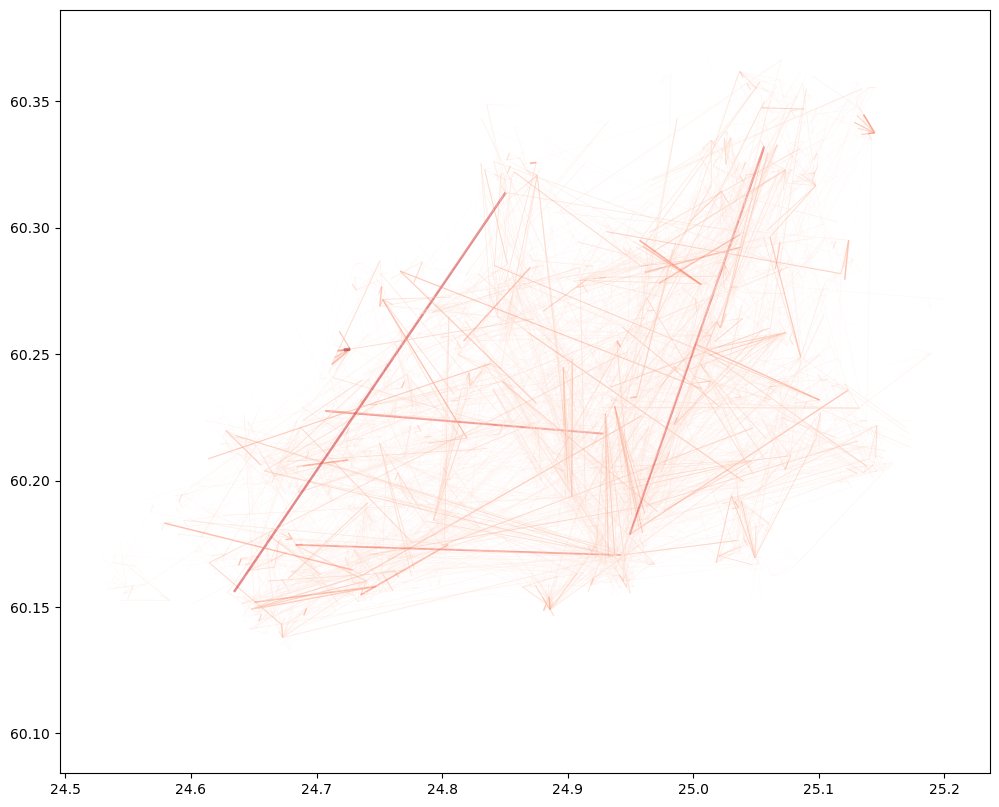

In [17]:
column = "EXTRAPOLATED_NUMBER_OF_USERS"
gdf.plot(column=column, cmap="Reds", linewidth=gdf[column]/1000, alpha=0.5, figsize=(12,12))

The map shows all the OD-flows in the region using Euclidian lines. The darker the color and the thicker the line, the more people have been travelling between these locations.

If you want to make a better looking map out of the flows, you can use e.g. [FlowmapBlue](https://www.flowmap.blue) or [lonboard](https://developmentseed.org/lonboard/latest/examples/migration/) which enable you to create nice interactive maps out of the flows.

### Preparing OD pair data for the next tutorials

In the next tutorials, we will need the OD pair information to calculate car and PT travel distances and mode of travels. The inputs for the next tutorials include transport network data (constructed using OpenStreetMap and GTFS), geographical points for origins and destinations (specified by latitude and longitude coordinates with Hexagon IDs), departure times, and specified transport modes (such as walking, biking, public transport, and car). Hence we prepare two datasets, one for origin and one for destinations as follows: 


In [18]:
# Prepare Origins
loco_Origin_Hex_LatLon = pd.DataFrame()
loco_Origin_Hex_LatLon['id'] = loco_sample_OD['origin_code_level_9']
loco_Origin_Hex_LatLon['lat'] = loco_Origin_Hex_LatLon.id.apply(lambda x: h3.h3_to_geo(str(x))[0])
loco_Origin_Hex_LatLon['lon'] = loco_Origin_Hex_LatLon.id.apply(lambda x: h3.h3_to_geo(str(x))[1])

# Prepare Destinations
loco_Destination_Hex_LatLon = pd.DataFrame()
loco_Destination_Hex_LatLon['id'] = loco_sample_OD['destination_code_level_9'] 
loco_Destination_Hex_LatLon['lat'] = loco_Destination_Hex_LatLon.id.apply(lambda x: h3.h3_to_geo(str(x))[0])
loco_Destination_Hex_LatLon['lon'] = loco_Destination_Hex_LatLon.id.apply(lambda x: h3.h3_to_geo(str(x))[1])

### Visualizing the polygons and boundary of the sample data

To get a better sense of the data map that shows the locations of the polygons and visualize the geographical boundary of each cell. We can calculate the Polygon boundaries of the OD hexagon cells of the locomizer data for future use. We can do this by applying shapely.geometry function to all the origin and destination hex-codes and calculating the boundary of the Polygons. 

*Note: You can ignore the UserWarning raised by geopandas about the geographic CRS. The geography columns is accurate enough for most purposes.*

#### Unqiue origin and destination hexgons of locomizer data

Unique origin and destination hexgons of locomizer data
We can find out how many unique OD pairs and hexagons are there to visualize. 

In [19]:
## finding out unique OD pairs
loco_u_OD = loco_sample_OD[['destination_code_level_9','origin_code_level_9']].drop_duplicates()
len(loco_u_OD)#

7217

In [20]:
##If you are interested in checking number of unique Hexagons
loco_concat_hex = pd.concat([loco_Origin_Hex_LatLon,loco_Destination_Hex_LatLon])
loco_u_hex = loco_concat_hex.drop_duplicates().reset_index(drop=True)
len(loco_u_hex)

3209

Let us check the unqiue hexagons

In [21]:
loco_u_hex['geometry'] = loco_u_hex.id.apply(lambda x: shapely.geometry.Polygon(h3.h3_to_geo_boundary(str(x), geo_json=True)))
loco_u_hex.head()

id        lat        lon  \
0  89089961267ffff  60.238804  24.643169   
1  89089968003ffff  60.190132  24.725095   
2  8908996800fffff  60.190463  24.730225   
3  8908996801bffff  60.187418  24.722887   
4  89089968063ffff  60.188410  24.738274   

                                            geometry  
0  POLYGON ((24.640723906995976 60.23778721015666...  
1  POLYGON ((24.722649768070344 60.18911702841219...  
2  POLYGON ((24.727778540207243 60.18944780076118...  
3  POLYGON ((24.72044178952002 60.186403225409265...  
4  POLYGON ((24.735827572834758 60.18739503712752...

In [24]:
loco_u_hex_gdf = gpd.GeoDataFrame({'ID': loco_u_hex.id.to_list(), 'geometry': loco_u_hex.geometry.to_list()}, crs="epsg:4326")
map_all = loco_u_hex_gdf.explore(color='blue') #m
map_all

This data will be used in the next tutorials to calculate shortest paths between given origins and destinations by different travel modes (car, public transport). 